In [8]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [9]:
AET = pd.read_csv("/home/chase_r/projects/stockTester/stockData/AET_data.csv")
AET

,date,open,high,low,close,volume,Name
0,2013-02-08,49.83,50.95,49.495,50.60,3844057,AET
1,2013-02-11,50.52,50.65,49.930,50.38,4020642,AET
2,2013-02-12,50.96,51.10,49.990,50.15,3122364,AET
3,2013-02-13,50.26,50.42,49.400,49.51,3604101,AET
4,2013-02-14,49.33,49.98,48.990,49.56,2194849,AET
...,...,...,...,...,...,...,...
1254,2018-02-01,186.52,188.85,186.160,187.39,2596718,AET
1255,2018-02-02,186.70,187.39,184.570,185.00,2199354,AET
1256,2018-02-05,184.49,185.39,180.780,180.95,2996979,AET
1257,2018-02-06,179.36,183.51,178.800,182.01,3450429,AET


In [10]:
tickerList = []
tickerData = {}

# Gets all the csv files in stockData
files = glob.glob("/home/chase_r/projects/stockTester/stockData/*.csv")

# Loops through and stores tickers into dataframe, and reads each file
for file in files:
    # Storing ticker name in tickerList
    ticker = file.split("/")[-1].split("_")[0]
    tickerList.append(ticker)

    # Reading the csv file into a dataframe and storing it in tickerData
    df = pd.read_csv(file)
    tickerData[ticker] = df

#

In [11]:
# --- Random Fun Test code ---
stockNum = rand.randint(0, 504)
randomStock = tickerList[stockNum]

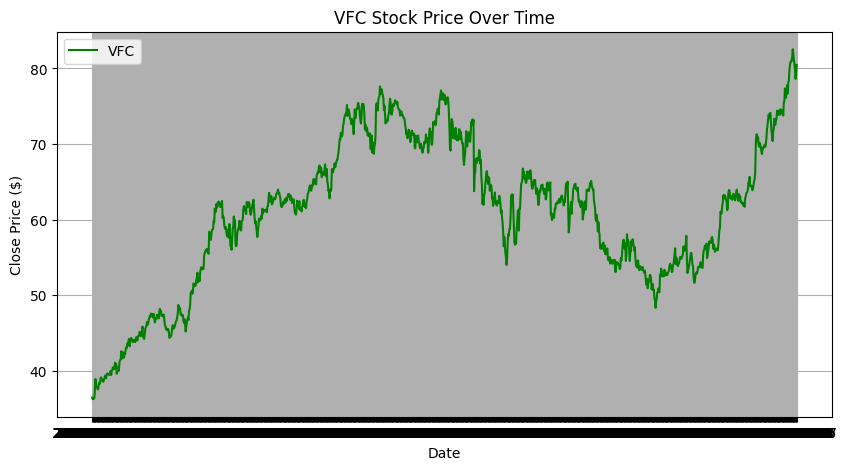

In [12]:
# Stock plotting
Graphcolor = 'red'

if tickerData[randomStock]['open'].iloc[0] < tickerData[randomStock]['open'].iloc[-1]:
    Graphcolor = 'green'


plt.figure(figsize=(10, 5))
plt.plot(tickerData[randomStock]["date"], tickerData[randomStock]["close"], label=randomStock, color = Graphcolor)
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title(f"{randomStock} Stock Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
### ADD MORE CODE HERE FOR ANALYSIS OR TESTING

Strategy #1 -- Buying stocks post crash

---


In [ ]:
# number of stocks that crashed over x% in a given time period O(N * M)
x = 0.2
crashLength = 30
crashCounter = {}

for ticker in tickerList:
    df = tickerData[ticker]
    
    # 2 pointer approach
    x = y = 0

    while x < len(df):
        if df.iloc[x]['open'] < (df.iloc[y]['open'] * 1 - crashLength):
            if ticker not in crashCounter:
                crashCounter[ticker] = 0
            crashCounter[ticker] += 1

        if x - y > crashLength:
            y += 1
        else:
            if x + 1 > len(df):
                break
            x += 1

# Lists for Crashed Stocks:
thrityPercentCrashed = []
twentyPercentCrashed = []
fourtyPercentCrashed = []            

print(f"Number of stocks that crashed over {x*100}% in {crashLength} days: {len(crashCounter)}")
        

Number of stocks that crashed over 125900% in 30 days: 80


In [17]:
crashedStocks = [ticker for ticker, count in crashCounter.items() if count > 0]
print(crashedStocks)

['BA', 'CELG', 'XEC', 'GWW', 'EQIX', 'ESS', 'URI', 'GOOGL', 'TDG', 'AMZN', 'FDX', 'CMG', 'ADS', 'NI', 'ZBH', 'PCLN', 'CXO', 'LYB', 'TRIP', 'BAX', 'HUM', 'MTD', 'DISCK', 'EBAY', 'PSA', 'AAPL', 'AVGO', 'CHTR', 'INCY', 'SHW', 'ANDV', 'MCK', 'NFLX', 'ORLY', 'GOOG', 'WHR', 'ULTA', 'REGN', 'FFIV', 'EXPE', 'AZO', 'AMG', 'PRGO', 'AGN', 'IBM', 'SRCL', 'AAP', 'YUM', 'SPG', 'RL', 'QRVO', 'ALGN', 'WYNN', 'ILMN', 'PXD', 'DISCA', 'SNA', 'SIG', 'SLG', 'BLK', 'AMGN', 'VRTX', 'APA', 'AMP', 'EFX', 'RE', 'AYI', 'MLM', 'SWKS', 'BIIB', 'ALXN', 'CI', 'EW', 'COST', 'MHK', 'GS', 'COO', 'ISRG', 'RCL', 'ROP']
